 # WATER QUALITY ANALYSIS

## Aim of Project Analysis

To primary aim of this analysis is to predict water quality parameters of water samples based on their features.

#Business Understanding

Water quality is the . It provides water quality measurements, featuring various attributes captured from water samples.The data contains information on the sample id, parameters, value and quality id for each water sample. The diffrent columns present in the data set are displayed below with their descriptions:
Sample ID: identifier for each water sample
Grab ID: identifier for the sample collection event
Profile ID:identifier for the water profile
Depth (m): the depth at which the water was collected
Value: the measurements value of a certain water quality parameter
Quality ID: identifier indicating the quality of the measurements
MDL: method detection limit
RDL: reporting detection limit
Replicates: number of replicates measurements
Replicates of: indicates if a sample is a replicate of another sample

## Data Understanding

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing csv file
data = pd.read_csv("water-quality-1.csv.zip")
data

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259439,185419,185419.0,78924,L73423-26,10/21/2019 10:38:00 AM,25.0,Marine Offshore,Central Puget Sound,KSSK02,West Point Outfall,...,0.060,0.120,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259440,185252,185252.0,78914,L73423-34,10/21/2019 11:45:00 AM,25.0,Marine Offshore,Central Puget Sound,LTED04,South Central Elliott Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259441,184301,184301.0,78849,L73423-17,10/21/2019 09:57:00 AM,14.8,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259442,183766,183766.0,78821,L73428-35,10/22/2019 01:09:00 PM,100.0,Marine Offshore,Central Puget Sound,NSEX01,East Passage,...,0.500,1.000,NaN,NaN,NaN,NaN,NaN,CTD,10/22/2019,KCEL


In [3]:
#Checking first 10 rows of the data 
data.head(10)

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,0.0020,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL
5,60091,60091.0,42106,L29749-54,09/02/2003 01:44:00 PM,1.0,Large Lakes,Lake Washington,0852,Lake Washington Madison Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
6,156539,NaN,68254,L70197-1,06/12/2018 08:55:00 AM,NaN,Streams and Rivers,Idylwood,A620,Idylwood Creek mouth at Idylwood Park,...,0.0005,0.002,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,06/14/2018,KCEL
7,64045,64045.0,41210,L47565-69,03/09/2009 12:50:00 PM,18.0,Large Lakes,Lake Washington,0852,Lake Washington Madison Park,...,0.5000,10.000,NaN,NaN,NaN,NaN,NaN,HYDROLAB (SOP 205V4),NaN,KCEL
8,41265,41265.0,40681,L48174-26,05/27/2009 10:18:00 AM,1.0,Large Lakes,Lake Sammamish,0611,Lake Sammamish mid-lake north,...,0.5000,10.000,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL
9,22772,NaN,19978,L19003-1,10/12/2000 09:42:00 AM,NaN,Streams and Rivers,Longfellow,C370,Longfellow Creek at SW Yancy St,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NONE,NaN,KCEL


In [4]:
#Checking bottom 10 rows of the data
data.tail(10)

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
1259434,185246,185246.0,78915,L73314-33,10/07/2019 12:22:00 PM,15.0,Marine Offshore,Central Puget Sound,LTED04,South Central Elliott Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/07/2019,KCEL
1259435,183985,183985.0,78834,L73317-14,10/08/2019 10:01:00 AM,10.0,Marine Offshore,Central Puget Sound,LSVV01,Fauntleroy Cove,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SM 9230C2A+B 23RD,10/10/2019,KCEL
1259436,185413,185413.0,78925,L73314-26,10/07/2019 11:13:00 AM,24.8,Marine Offshore,Central Puget Sound,KSSK02,West Point Outfall,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,SM 9230C2A+B 23RD,10/09/2019,KCEL
1259437,183597,183597.0,78787,L73428-12,10/22/2019 08:53:00 AM,35.0,Marine Offshore,Central Puget Sound,LSKQ06,Alki Outfall,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,SM 9222D 23RD,10/23/2019,KCEL
1259438,183764,183764.0,78817,L73317-29,10/08/2019 12:45:00 PM,0.9,Marine Offshore,Central Puget Sound,NSEX01,East Passage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/08/2019,KCEL
1259439,185419,185419.0,78924,L73423-26,10/21/2019 10:38:00 AM,25.0,Marine Offshore,Central Puget Sound,KSSK02,West Point Outfall,...,0.06,0.12,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259440,185252,185252.0,78914,L73423-34,10/21/2019 11:45:00 AM,25.0,Marine Offshore,Central Puget Sound,LTED04,South Central Elliott Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259441,184301,184301.0,78849,L73423-17,10/21/2019 09:57:00 AM,14.8,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259442,183766,183766.0,78821,L73428-35,10/22/2019 01:09:00 PM,100.0,Marine Offshore,Central Puget Sound,NSEX01,East Passage,...,0.50,1.00,NaN,NaN,NaN,NaN,NaN,CTD,10/22/2019,KCEL
1259443,185249,185249.0,78914,L73423-37,10/21/2019 11:41:00 AM,75.0,Marine Offshore,Central Puget Sound,LTED04,South Central Elliott Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL


In [5]:
#Quick inspection of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259444 entries, 0 to 1259443
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Sample ID         1259444 non-null  int64  
 1   Grab ID           882666 non-null   float64
 2   Profile ID        1259444 non-null  int64  
 3   Sample Number     1259444 non-null  object 
 4   Collect DateTime  1259444 non-null  object 
 5   Depth (m)         882666 non-null   float64
 6   Site Type         1259444 non-null  object 
 7   Area              1259311 non-null  object 
 8   Locator           1259444 non-null  object 
 9   Site              1259444 non-null  object 
 10  Parameter         1259444 non-null  object 
 11  Value             1150359 non-null  float64
 12  Units             1258664 non-null  object 
 13  QualityId         1259444 non-null  int64  
 14  Lab Qualifier     149373 non-null   object 
 15  MDL               607733 non-null   float64
 16  

In [6]:
#Summary of the data
data.describe()

,Sample ID,Grab ID,Profile ID,Depth (m),Value,QualityId,MDL,RDL,Replicates,Replicate Of
count,1.259444e+06,882666.000000,1.259444e+06,882666.000000,1.150359e+06,1.259444e+06,607733.000000,606146.000000,1641.000000,1531.000000
mean,8.072059e+04,88473.753640,4.265437e+04,10.602864,1.534332e+02,1.948271e+00,0.323792,1.900974,105815.064595,112754.053560
std,5.168191e+04,46349.581657,1.659986e+04,14.142444,6.204438e+03,5.608278e-01,0.495199,3.280455,55902.772689,50282.683689
min,5.310000e+02,700.000000,4.000000e+00,0.000000,-1.600000e+00,0.000000e+00,0.000000,0.000000,2824.000000,2153.000000
25%,3.191200e+04,54359.250000,3.647275e+04,1.000000,9.100000e-01,2.000000e+00,0.010000,0.040000,63136.000000,63376.000000
50%,7.482800e+04,86714.000000,4.273100e+04,6.000000,7.630000e+00,2.000000e+00,0.500000,1.000000,123467.000000,127822.000000
75%,1.257890e+05,125306.000000,5.025800e+04,15.000000,2.400000e+01,2.000000e+00,0.500000,1.000000,156988.000000,157521.000000
max,1.860330e+05,186033.000000,7.911900e+04,201.000000,1.000000e+06,9.000000e+00,100.000000,60.000000,185802.000000,185803.000000


In [7]:
#Summary of the data
data.describe(include="object")

,Sample Number,Collect DateTime,Site Type,Area,Locator,Site,Parameter,Units,Lab Qualifier,Text Value,Sample Info,Steward Note,Method,Date Analyzed,Data Source
count,1259444,1259444,1259444,1259311,1259444,1259444,1259444,1258664,149373,228692,3143,680,1069005,567782,1259444
unique,154694,102284,6,67,180,178,47,23,51,24856,353,64,202,4610,1
top,L24837-2,10/20/1992 12:00:00 AM,Large Lakes,Lake Washington,0852,Lake Washington Madison Park,Temperature,mg/L,<MDL,N,nothing to note,Suspect method detection limit of 10 use with...,NONE,08/15/2018,KCEL
freq,23,675,760262,414928,114827,114827,126633,483062,71015,15448,117,162,130214,1209,1259444


In [8]:
# Checking the shape of a data frame
data.shape

(1259444, 25)

In [9]:
for col in data.columns:
    print(col)

Sample ID
Grab ID
Profile ID
Sample Number
Collect DateTime
Depth (m)
Site Type
Area
Locator
Site
Parameter
Value
Units
QualityId
Lab Qualifier
MDL
RDL
Text Value
Sample Info
Steward Note
Replicates
Replicate Of
Method
Date Analyzed
Data Source


Data Cleaning

In [10]:
#Check for number of  duplicate entries
data.duplicated().sum()

0

In [11]:
# Checking the total number of Nulls
data.isnull().sum()

Sample ID                 0
Grab ID              376778
Profile ID                0
Sample Number             0
Collect DateTime          0
Depth (m)            376778
Site Type                 0
Area                    133
Locator                   0
Site                      0
Parameter                 0
Value                109085
Units                   780
QualityId                 0
Lab Qualifier       1110071
MDL                  651711
RDL                  653298
Text Value          1030752
Sample Info         1256301
Steward Note        1258764
Replicates          1257803
Replicate Of        1257913
Method               190439
Date Analyzed        691662
Data Source               0
dtype: int64

In [12]:
#Removing all blank rows
data_clean = data.dropna(how='all')
data_clean

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259439,185419,185419.0,78924,L73423-26,10/21/2019 10:38:00 AM,25.0,Marine Offshore,Central Puget Sound,KSSK02,West Point Outfall,...,0.060,0.120,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259440,185252,185252.0,78914,L73423-34,10/21/2019 11:45:00 AM,25.0,Marine Offshore,Central Puget Sound,LTED04,South Central Elliott Bay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259441,184301,184301.0,78849,L73423-17,10/21/2019 09:57:00 AM,14.8,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,10/21/2019,KCEL
1259442,183766,183766.0,78821,L73428-35,10/22/2019 01:09:00 PM,100.0,Marine Offshore,Central Puget Sound,NSEX01,East Passage,...,0.500,1.000,NaN,NaN,NaN,NaN,NaN,CTD,10/22/2019,KCEL


In [13]:
#removing columns with too many nulls
cols_to_remove = ['Lab Qualifier','MDL','RDL','Text Value','Sample Info','Steward Note','Replicates','Replicate Of']
data_clean = data_clean.drop(cols_to_remove,axis=1)

In [14]:
# Convert appropriate columns to numeric types
numeric_columns = ['Sample ID', 'Grab ID', 'Profile ID', 'Depth (m)', 'Value', 'QualityId']
data_clean[numeric_columns] = data_clean[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [15]:
# Fill missing values with 'Unknown'
data_clean.fillna('Unknown', inplace=True)

In [16]:
#checking for the data types of the clean data
data_clean.dtypes

Sample ID            int64
Grab ID             object
Profile ID           int64
Sample Number       object
Collect DateTime    object
Depth (m)           object
Site Type           object
Area                object
Locator             object
Site                object
Parameter           object
Value               object
Units               object
QualityId            int64
Method              object
Date Analyzed       object
Data Source         object
dtype: object

In [17]:
#Print the cleaned data
data_clean.head()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,Total Phosphorus,0.07,mg/L,2,none,Unknown,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,Nitrite + Nitrate Nitrogen,0.727,mg/L,2,Unknown,Unknown,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,Temperature,18.9,deg C,2,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,Orthophosphate Phosphorus,0.00724,mg/L,2,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,Temperature,8.94,deg C,2,HYDROLAB,Unknown,KCEL


In [18]:
 #Checking the summary of the cleaned data
data_clean.describe()

,Sample ID,Profile ID,QualityId
count,1.259444e+06,1.259444e+06,1.259444e+06
mean,8.072059e+04,4.265437e+04,1.948271e+00
std,5.168191e+04,1.659986e+04,5.608278e-01
min,5.310000e+02,4.000000e+00,0.000000e+00
25%,3.191200e+04,3.647275e+04,2.000000e+00
50%,7.482800e+04,4.273100e+04,2.000000e+00
75%,1.257890e+05,5.025800e+04,2.000000e+00
max,1.860330e+05,7.911900e+04,9.000000e+00


In [19]:
# Saving to a csv
data.to_csv("../desktop/data_clean.csv", index=False)

Visualising the Dataset

In [20]:
# Importing matplot library
import matplotlib.pyplot as plt 

In [21]:
data_clean.columns

Index(['Sample ID', 'Grab ID', 'Profile ID', 'Sample Number',
       'Collect DateTime', 'Depth (m)', 'Site Type', 'Area', 'Locator', 'Site',
       'Parameter', 'Value', 'Units', 'QualityId', 'Method', 'Date Analyzed',
       'Data Source'],
      dtype='object')

In [22]:
depth_parameter = data.groupby("Parameter")["Depth (m)"].sum().round(2).to_frame()
depth_parameter

,Depth (m)
Parameter,
Ammonia Nitrogen,394276.07
BGA PC Field,221057.40
Biochemical Oxygen Demand,2535.40
Chlorophyll Field,668019.96
Chlorophyll a,89188.78
Conductivity,45429.60
Conductivity Field,1000593.27
Density,43060.39
Dissolved Organic Carbon,12133.60


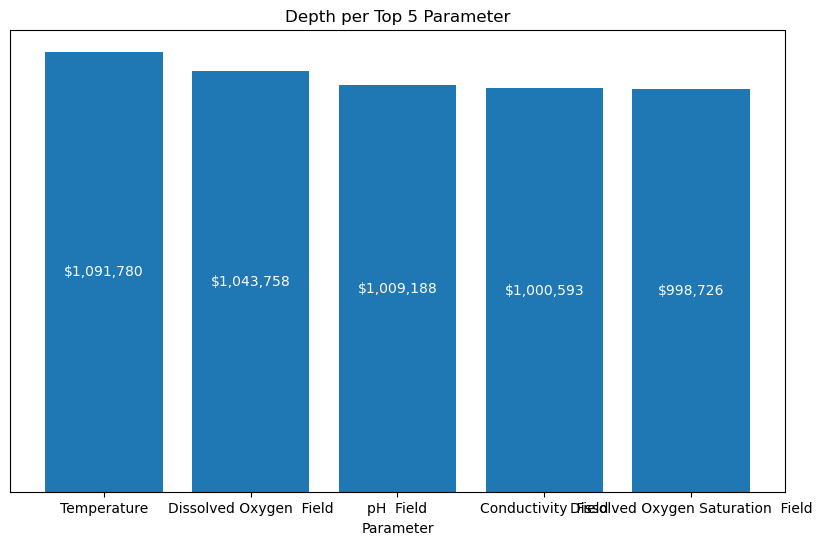

In [23]:
#visualizing Parameter and Depth (m)
top_5_depth_parameter = depth_parameter.sort_values(by="Depth (m)", ascending=False).head(5)

# Print the top 5 by Depth
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_depth_parameter.index, top_5_depth_parameter["Depth (m)"])
plt.title("Depth per Top 5 Parameter")
plt.xlabel("Parameter")
plt.ylabel("Depth (m)")

# Add data labels in the center of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'${yval:,.0f}', va='center', ha='center', color='white')  # va: vertical alignment, ha: horizontal alignment

# Remove the y-axis
plt.gca().axes.yaxis.set_visible(False)
plt.savefig('Depth per Top 5 Parameter.jpeg')
plt.show()

Distribution of Value

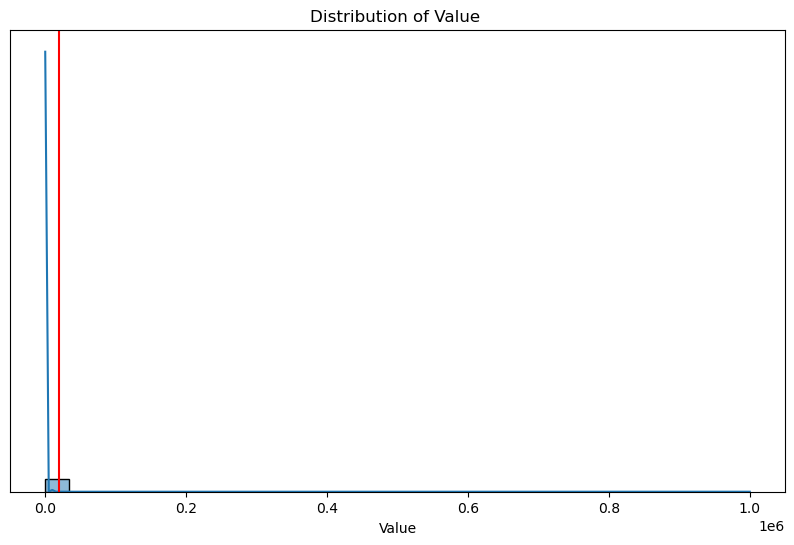

In [24]:
# # Histogram for 'Value'

data_clean['Value'] = pd.to_numeric(data_clean['Value'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(data_clean["Value"].dropna(), bins=30, kde=True)
plt.title('Distribution of Value ')
plt.xlabel('Value')
plt.ylabel('Count')
plt.axvline(19489, color='r')
plt.gca().axes.yaxis.set_visible(False)
plt.savefig('histogram_of_values.jpeg')
plt.show()

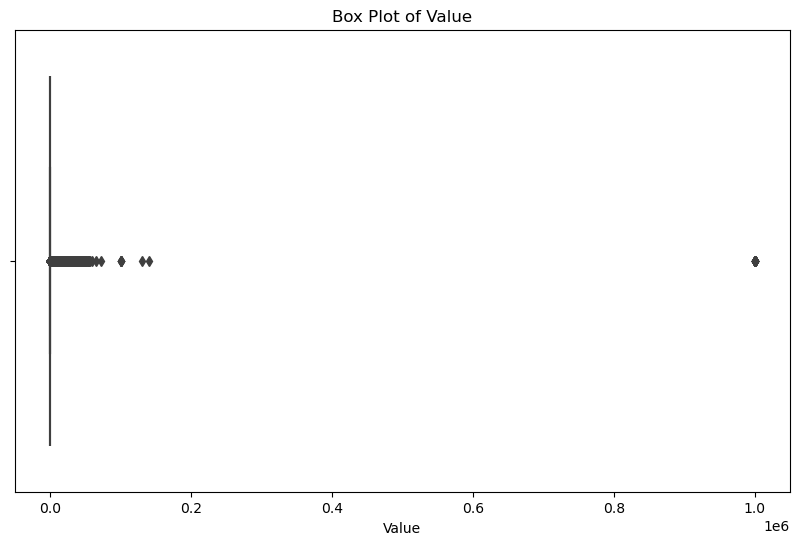

In [25]:
# Box Plot for 'Value'

plt.figure(figsize=(10, 6))  # Corrected the figsize argument by adding parentheses
sns.boxplot(x=data_clean["Value"])
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.savefig('boxplot_of_values.jpeg')
plt.show()

Relationship Between Variables

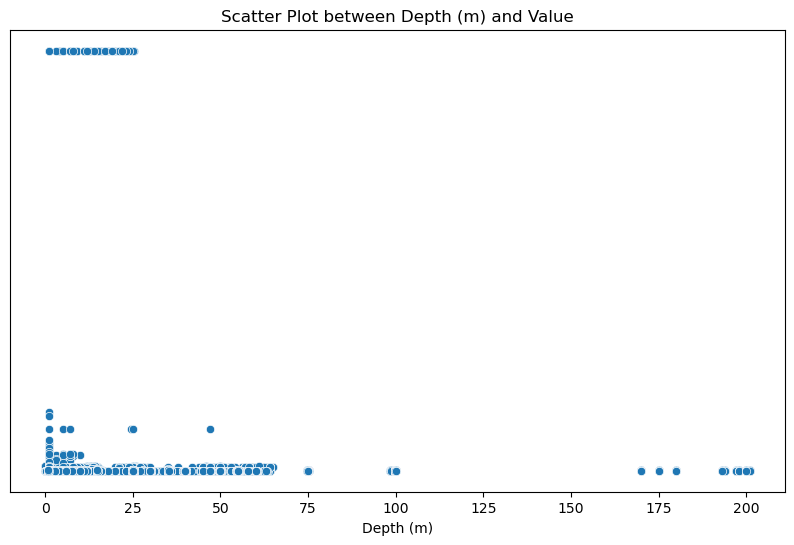

In [26]:
# Scatter plot between 'Depth (m)' and 'Value'

data_clean['Value'] = pd.to_numeric(data_clean['Value'], errors='coerce')
data_clean['Depth (m)'] = pd.to_numeric(data_clean['Depth (m)'], errors='coerce')

# Drop rows with NaN values in 'Value' and 'Depth (m)' columns
data_clean = data_clean.dropna(subset=['Value', 'Depth (m)'])

# Scatter plot between 'Depth (m)' and 'Value'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clean['Depth (m)'], y=data_clean['Value'])
plt.title('Scatter Plot between Depth (m) and Value')
plt.xlabel('Depth (m)')
plt.ylabel('Value')
plt.gca().axes.yaxis.set_visible(False)
plt.savefig('scatterplot_between_depth_and_value.jpeg')
plt.show()

Data Modelling

Separating the data into predictor variables and target variable

In [27]:
# 1. Separating the data into predictor variables (X) and target variable (y)
X = data.drop(columns=['Value', 'Sample Number', 'Collect DateTime', 'Site Type', 'Area', 'Locator', 'Site',
                       'Parameter', 'Units', 'Method', 'Date Analyzed', 'Data Source'])

y = data['Value']

Scaling numerical features

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features in X
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
X_scaled = X.copy()  # Create a copy of X to store scaled values
X_scaled[numeric_columns] = scaler.fit_transform(X[numeric_columns])  # Fit and transform scaler on numerical columns


Encoding categorical variables

In [29]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_columns = ['Sample ID', 'Grab ID', 'Profile ID', 'QualityId']

# Dictionary to store label encoders
label_encoders = {}

# Initialize LabelEncoder and transform each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

Checking predictor variables

In [30]:
X

,Sample ID,Grab ID,Profile ID,Depth (m),QualityId,Lab Qualifier,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of
0,10359,8418,5897,1.0,2,NaN,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN
1,2980,2039,24872,1.0,2,NaN,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN
2,126183,95447,40272,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120262,90870,36517,1.0,2,NaN,0.002,0.005,NaN,NaN,NaN,NaN,NaN
4,75850,51037,31077,4.2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259439,154161,112575,54831,25.0,1,NaN,0.060,0.120,NaN,NaN,NaN,NaN,NaN
1259440,154085,112505,54825,25.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259441,153971,112401,54813,14.8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259442,153912,112346,54802,100.0,1,NaN,0.500,1.000,NaN,NaN,NaN,NaN,NaN


In [31]:
X['Sample ID'].nunique()

154694

Checking target variable

In [32]:
y

0             0.07000
1             0.72700
2            18.90000
3             0.00724
4             8.94000
              ...    
1259439       1.20000
1259440       0.90000
1259441    1020.00000
1259442       5.50000
1259443      12.40000
Name: Value, Length: 1259444, dtype: float64

Splitting data into train dataset and test dataset

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Define the list of feature columns
feature_columns = ['Sample ID', 'Grab ID', 'Profile ID', 'QualityId']

# Extract the features into X_clean using correct DataFrame column selection syntax
X_clean = data_clean[feature_columns]
y_clean = data_clean['Value']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.20, random_state=42)

# Print the shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (645651, 4)
Shape of X_test: (161413, 4)
Shape of y_train: (645651,)
Shape of y_test: (161413,)


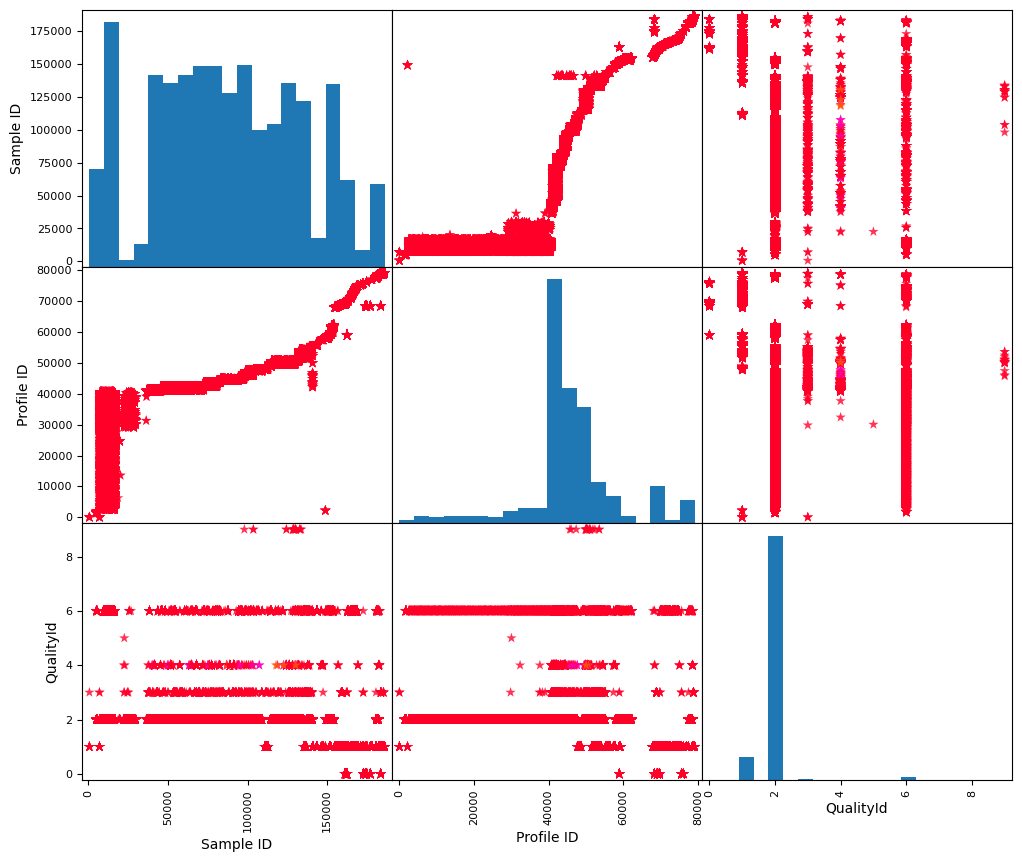

In [39]:
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined correctly
pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(12, 10), marker='*', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=cm.get_cmap('gist_rainbow'))
plt.show()

Building a Linear Regression Model

In [40]:
# #Importing libraries
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

In [41]:
#Instantiating the linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Training the model

In [42]:
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, and y_test are defined correctly
# Instantiate the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Now you can safely predict using the trained model
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 62474621.73081953


In [43]:
# Train the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [45]:
lr.predict(X_test)

array([155.01553218, 123.19974725, 117.00059283, ..., 159.73656839,
       127.45440628, 122.54573059])

In [46]:
print("lr.coef_: {}\n".format(lr.coef_))

print("lr.intercept_: {}\n".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 3.44752756e-02 -3.51996705e-02  1.02403393e-02  4.52612151e+02]

lr.intercept_: -1171.3921822650368

Training set score: 0.00
Test set score: 0.00


In [47]:
y_pred = lr.predict(X_test)

In [48]:
y_pred

array([155.01553218, 123.19974725, 117.00059283, ..., 159.73656839,
       127.45440628, 122.54573059])

In [49]:
#checking the error that exist between predicted values and actual values

mse = mean_squared_error(y_test,y_pred)

In [50]:
mse

62474621.73081953